In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# Read data from mesa data: 
#b = pd.read_excel("ONe6040_helm_update_rm.xlsx")
a = pd.read_excel('ONe6040_helm_update.xlsx')

In [2]:
r_cm = np.array(a["radius_cm"])
r_center = []

for i in range(r_cm.shape[0]-1):
    r_center.append((r_cm[i]+r_cm[i+1])/2)

r_center.append(r_cm[-1]/2)

In [3]:
rho = np.power(10,np.array(a["logRho"]))
temp = np.array(a["temperature"])
pressure = np.array(a['pressure'])

In [4]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_center[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon-20'] = np.array(a['ne20'])[::-1]
data['oxygen-16'] =  np.array(a['o16'])[::-1]
data['oxygen-20'] =  np.array(a['o20'])[::-1]
data['magnesium-24'] =  np.array(a['mg24'])[::-1]
data['fluorine-20'] =  np.array(a['f20'])[::-1]
data['helium-4'] =  np.array(a['he4'])[::-1]
data['aluminum-27'] = 0.0
data['silicon-28'] =  np.array(a['si28'])[::-1]
data['sulfur-32'] = 0.0
data['phosphorus-31'] = 0.0
data['hydrogen-1'] =  np.array(a['h1'])[::-1]

In [5]:
data.head()

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1
0,2113.473042,8.348568e+09,6.565855e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964879e-16,2.021100e-09,8.924793e-23,0.0,0.000004,0.0,0.0,0.0
1,4305.738968,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964889e-16,2.021100e-09,8.924807e-23,0.0,0.000004,0.0,0.0,0.0
2,4421.925944,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964890e-16,2.021100e-09,8.924809e-23,0.0,0.000004,0.0,0.0,0.0
3,4495.428868,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964891e-16,2.021100e-09,8.924810e-23,0.0,0.000004,0.0,0.0,0.0
4,4558.056826,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964892e-16,2.021100e-09,8.924811e-23,0.0,0.000004,0.0,0.0,0.0


In [6]:
data.shape

(1901, 15)

In [23]:
df = data[data['temperature [K]']>8.5e8]

In [25]:
df['temp'] = df['temperature [K]']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_max = df[df['temperature [K]'] == max(df['temperature [K]'])]

In [48]:
r0 = float(df_max['r_center [cm]'])

In [90]:
df['temp'] = max(df['temperature [K]'])*np.exp(-(df['r_center [cm]']-r0)**2/3800000000000)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
df.tail()

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1,temp
707,8.189789e+06,7.366165e+09,8.634836e+08,6.766953e+27,0.297441,0.599692,0.102636,5.710079e-11,4.652639e-08,3.903448e-20,0.0,0.000194,0.0,0.0,0.000000e+00,8.982279e+08
708,8.208368e+06,7.361118e+09,8.609657e+08,6.764507e+27,0.299559,0.599721,0.100510,5.263724e-11,4.592065e-08,3.618417e-20,0.0,0.000176,0.0,0.0,0.000000e+00,8.900694e+08
709,8.235378e+06,7.353790e+09,8.571953e+08,6.760939e+27,0.302636,0.599760,0.097422,4.655408e-11,4.501351e-08,3.229058e-20,0.0,0.000152,0.0,0.0,1.142543e-41,8.780557e+08
710,8.260894e+06,7.346924e+09,8.534441e+08,6.757573e+27,0.305521,0.599793,0.094530,4.114733e-11,4.411029e-08,2.882423e-20,0.0,0.000131,0.0,0.0,0.000000e+00,8.665499e+08
711,8.276424e+06,7.342817e+09,8.510992e+08,6.755519e+27,0.307229,0.599812,0.092817,3.806702e-11,4.354057e-08,2.684461e-20,0.0,0.000119,0.0,0.0,0.000000e+00,8.594770e+08


In [132]:
dn = pd.DataFrame(data = [0]*data.shape[0], columns=['temp'])
dn.temp[544:712] = df[(df.index>543) & (df.index<712)]['temp']
dn.temp[0:544] = data['temperature [K]'][0:544]
dn.temp[712:-1] = data['temperature [K]'][712:-1]

In [185]:
data['temperature [K]'] = dn['temp']

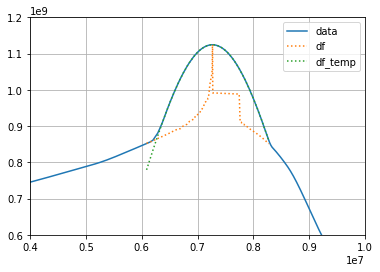

In [187]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],label='data')
plt.plot(df['r_center [cm]'],df['temperature [K]'],':',label='df')
plt.plot(df['r_center [cm]'],df['temp'],':',label='df_temp')
#plt.plot(data['r_center [cm]'],dn['temp'],'o-',label='dn')
plt.xlim(4e6,10e6)
plt.ylim(6e8,12.0e8)
plt.grid()
plt.legend()

In [141]:
dn.temp[542]

862611879.832303

In [189]:
f = open("ECSN-ONe6040-final.raw", "w")

header = '# npts = 1901\n# num of variables = 14\n# density\n# temperature\n# pressure\n# neon-20\n# oxygen-16\n# oxygen-20\n# magnesium-24\n# fluorine-20\n# helium-4\n# aluminum-27\n# silicon-28\n# sulfur-32\n# phosphorus-31\n# hydrogen-1\n'
f.write(header)

for i in range(1901):
    for j in data.columns:
        f.write(str(data[j][i]))
        f.write(' ')
    f.write('\n')
f.close()

In [188]:
data

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1
0,2.113473e+03,8.348568e+09,6.565855e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964879e-16,2.021100e-09,8.924793e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
1,4.305739e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964889e-16,2.021100e-09,8.924807e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
2,4.421926e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964890e-16,2.021100e-09,8.924809e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
3,4.495429e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964891e-16,2.021100e-09,8.924810e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
4,4.558057e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964892e-16,2.021100e-09,8.924811e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
5,4.635781e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964884e-16,2.021102e-09,8.924784e-23,0.0,3.520499e-06,0.0,0.0,0.000000e+00
6,4.749474e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964871e-16,2.021103e-09,8.924759e-23,0.0,3.520622e-06,0.0,0.0,0.000000e+00
7,4.848488e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964873e-16,2.021103e-09,8.924761e-23,0.0,3.520622e-06,0.0,0.0,0.000000e+00
8,4.920481e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964899e-16,2.021102e-09,8.924808e-23,0.0,3.520367e-06,0.0,0.0,3.074448e-43
9,4.990426e+03,8.348567e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964907e-16,2.021102e-09,8.924824e-23,0.0,3.521642e-06,0.0,0.0,0.000000e+00


In [ ]:
 Mass Fraction (h1   ):   0.19430300000000000     
 Mass Fraction (he4  ):   0.58811899999999995     
 Mass Fraction (o16  ):   0.20940100000000000     
 Mass Fraction (o20  ):    1.8114180000000001E-007
 Mass Fraction (f20  ):    5.7456529999999999E-007
 Mass Fraction (ne20 ):    3.1221530000000001E-017
 Mass Fraction (mg24 ):    0.0000000000000000     
 Mass Fraction (al27 ):    7.3150000000000003E-003
 Mass Fraction (si28 ):    0.0000000000000000     
 Mass Fraction (p31  ):    0.0000000000000000     
 Mass Fraction (s32  ):    0.0000000000000000     

In [12]:
str(data[610:611]['neon-20'])

'610    0.194303\nName: neon-20, dtype: float64'

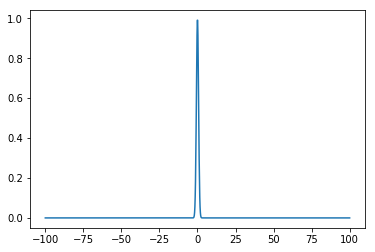

In [28]:
x = np.linspace(-100,100,1000)
y = np.exp(-x**2)
plt.plot(x,y)

In [29]:
max(df['temperature [K]'])

1124422088.1923

In [62]:
df[df['temperature [K]'] == max(df['temperature [K]'])]

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1,temp
610,7.265948e+06,7.615707e+09,1.124422e+09,6.884665e+27,0.194303,0.588119,0.209401,1.811418e-07,5.745653e-07,3.122153e-17,0.0,0.007315,0.0,0.0,0.0,1.124422e+09


In [67]:
df[61:81]

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1,temp
600,7.263937e+06,7.616735e+09,1.090332e+09,6.884911e+27,0.193206,0.592200,0.209310,6.330696e-08,3.892895e-07,1.471916e-17,0.0,0.004756,0.0,0.0,0.000000e+00,3.088299e-09
601,7.264161e+06,7.616547e+09,1.094458e+09,6.884884e+27,0.193235,0.592106,0.209317,7.206147e-08,4.067383e-07,1.615492e-17,0.0,0.004807,0.0,0.0,0.000000e+00,1.499586e-05
602,7.264384e+06,7.616347e+09,1.098852e+09,6.884856e+27,0.193261,0.591999,0.209324,8.265176e-08,4.257290e-07,1.783015e-17,0.0,0.004872,0.0,0.0,0.000000e+00,2.681406e-02
603,7.264608e+06,7.616138e+09,1.103523e+09,6.884829e+27,0.193284,0.591876,0.209330,9.552748e-08,4.462855e-07,1.979030e-17,0.0,0.004955,0.0,0.0,0.000000e+00,1.765806e+01
604,7.264831e+06,7.615924e+09,1.108440e+09,6.884801e+27,0.193315,0.591736,0.209340,1.111097e-07,4.681470e-07,2.206952e-17,0.0,0.005043,0.0,0.0,0.000000e+00,4.283118e+03
605,7.265054e+06,7.615707e+09,1.113565e+09,6.884773e+27,0.193354,0.591572,0.209351,1.298376e-07,4.908695e-07,2.469987e-17,0.0,0.005142,0.0,0.0,0.000000e+00,3.827000e+05
606,7.265222e+06,7.615540e+09,1.117533e+09,6.884751e+27,0.193386,0.591434,0.209359,1.462325e-07,5.079532e-07,2.692427e-17,0.0,0.005226,0.0,0.0,0.000000e+00,5.775440e+06
607,7.265334e+06,7.615429e+09,1.120212e+09,6.884737e+27,0.193409,0.591337,0.209365,1.583012e-07,5.192729e-07,2.852275e-17,0.0,0.005286,0.0,0.0,0.000000e+00,2.581576e+07
608,7.265501e+06,7.615849e+09,1.120212e+09,6.884718e+27,0.194196,0.588506,0.209380,1.591716e-07,5.381234e-07,2.846099e-17,0.0,0.007093,0.0,0.0,0.000000e+00,1.527708e+08
609,7.265725e+06,7.615873e+09,1.120210e+09,6.884694e+27,0.194242,0.588339,0.209391,1.592050e-07,5.580566e-07,2.845759e-17,0.0,0.007187,0.0,0.0,0.000000e+00,6.826820e+08


In [65]:
df.shape

(173, 16)

In [127]:
data

,r_center [cm],density [g/cm3],temperature [K],pressure,neon-20,oxygen-16,oxygen-20,magnesium-24,fluorine-20,helium-4,aluminum-27,silicon-28,sulfur-32,phosphorus-31,hydrogen-1
0,2.113473e+03,8.348568e+09,6.565855e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964879e-16,2.021100e-09,8.924793e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
1,4.305739e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964889e-16,2.021100e-09,8.924807e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
2,4.421926e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964890e-16,2.021100e-09,8.924809e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
3,4.495429e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964891e-16,2.021100e-09,8.924810e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
4,4.558057e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964892e-16,2.021100e-09,8.924811e-23,0.0,3.520184e-06,0.0,0.0,0.000000e+00
5,4.635781e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964884e-16,2.021102e-09,8.924784e-23,0.0,3.520499e-06,0.0,0.0,0.000000e+00
6,4.749474e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964871e-16,2.021103e-09,8.924759e-23,0.0,3.520622e-06,0.0,0.0,0.000000e+00
7,4.848488e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964873e-16,2.021103e-09,8.924761e-23,0.0,3.520622e-06,0.0,0.0,0.000000e+00
8,4.920481e+03,8.348568e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964899e-16,2.021102e-09,8.924808e-23,0.0,3.520367e-06,0.0,0.0,3.074448e-43
9,4.990426e+03,8.348567e+09,6.565856e+08,7.367388e+27,0.007297,0.599994,3.927048e-01,4.964907e-16,2.021102e-09,8.924824e-23,0.0,3.521642e-06,0.0,0.0,0.000000e+00
